# Curve fitting - Least squares regression

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

This notebook is an introduction to least squares regression for curve fitting.

The objectives of this chapter are to:
* understand the basic concepts and algorithms for least squares regression
* know linear regression
* know linearizable regression



## Least-squares regression

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that here the index starts at 0 to be consistent with the zero-based index in Python. In lecture notes and the book, the index starts at 1. 

### Linear regression analysis

The goal of linear regression analysis is to find a linear function (straight line) which fits the given set of data points best. The linear function can be written as 
\begin{equation}
   y = a_0 + a_1 x + e
\end{equation}
where $a_0$ and $a_1$ are regression coefficients representing the intercept and slope, respectively. $e$ is the error or residual, which is the distance between the given function value and the predicted one. Among many other definitions, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)^2
\end{equation}

To minimize the error, taking derivative with respect to the two coefficient $a_0$ and $a_1$ and making them to be zero, one gets
\begin{equation}
\frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)=0
\end{equation}
\begin{equation}
\frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i\right) x_i \right]=0
\end{equation}
thus,
\begin{equation}
\sum_{i=0}^{N-1} y_i - \sum_{i=0}^{N-1} a_0 - \sum_{i=0}^{N-1} a_1 x_i =0
\end{equation}
\begin{equation}
\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} a_0 x_i - \sum_{i=0}^{N-1} a_1 x_i^2 =0
\end{equation}
which are two linear equations for the two coefficients. It is easy to show that
\begin{equation}
a_1 = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i }{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2}
\end{equation}
and 
\begin{equation}
a_0 = \overline{y} - a_1 \overline{x}
\end{equation}
where $\overline{x}$ and $\overline{y}$ are the mean values of $x$ and $y$, respectively.

Often, it is necessary to quantify how well the linear fit is. In other words, we need to quantify the error. One way to quantify is the use of "coefficient of determination" $r^2$:
\begin{equation}
r^2 = \frac{S_m - Error}{S_m} = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i}{\sqrt{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2} \sqrt{n\sum_{i=0}^{N-1} y_i^2 - (\sum_{i=0}^{N-1} y_i)^2}}
\end{equation}
where $S_m$ is the total sum of the squares of the deviation in $y$ around its mean. Thus, the difference between $S_m$ and $Error$ measures the improvement (or reduction in error) by fitting the data with a linear relation in comparison with just the mean. $r$ is called the correlation coefficient. When $r$ = 1, $Error$ is zero which means it is a perfect fit. When $r$ = 0, $Error$ is the same as $S_m$ which means the linear fit contributes no improvement over using the mean. 

The above formulas have been implemented in the function named "calculate_linear_regression_coef(...)" which returns the calculated coefficients and $r^2$. 

It is noted that in the code, we used the inner product function for vectors in Numpy. For example, **np.inner(x,x)** returns the inner product of the vector **x**, which is essentially
\begin{equation}
   np.inner(x,x) =  \sum_{i=0}^{N-1} x_i^2
\end{equation}

We also used Numpy's sum(...) function which sums up all elements of a vector. The use of these Numpy function makes the code more compact and easy to understand. You don't have to follow this in your own code, in which case you have to program all these summations.

```python
import numpy as np 

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
	if(np.size(x) != np.size(y)):
 		sys.exit("The two vectors x and y are not of the same length.")

	# number of observations/points 
	n = np.size(x)

	sx = np.sum(x)
	sy = np.sum(y)

	sx2 = np.inner(x,x)
	sxy = np.inner(x,y)
	sy2 = np.inner(y,y)

	# calculating regression coefficients 
	a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
	a0 = sy/n - a1*sx/n

	r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

	return(a0, a1, r2) 
```

The following calls the function and demonstrates its use. 

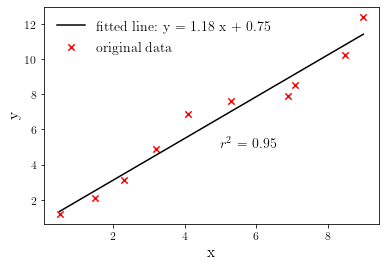

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys


#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([0.5, 1.5, 2.3, 3.2, 4.1, 5.3, 6.9, 7.1, 8.5, 9.0]) 
y = np.array([1.2, 2.1, 3.1, 4.9, 6.9, 7.6, 7.9, 8.5, 10.2, 12.4]) 

# calculate the linear regression coefficients 
a0, a1, r2 = calculate_linear_regression_coef(x, y) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred = a0 + a1*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line: y = %.2f x + %.2f'%(a1, a0)) 

plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

### Linearizable nonlinear curve fitting

In many applications, the relationship is nonlinear and thus does not make sense to force a linear curve fitting. Nonlinear curve fitting is much more difficult and we have a separate section for it. But here, we introduce some transformation techniques which can be used to linearize nonlinear curve fitting. 

We discuss three categories of linearizable nonlinear curve fitting:
* exponential equation
\begin{equation}
y = a_0 e^{a_1 x}
\end{equation}
where $a_0$ and $a_1$ are fitting coefficients. Taking natural logarithm to both sides of the equation gives
\begin{equation}
\ln y = \ln a_0 + a_1 x
\end{equation}
Therefore, a linear curve fitting now is sought between $x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* power equation
\begin{equation}
y = a_0 x^{a_1}
\end{equation}
Again taking natural logarithm gives
\begin{equation}
\ln y = \ln a_0 + a_1 \ln x
\end{equation}
and the linear curve fitting is sought between $\ln x$ and $\ln y$. And the interception is $\ln a_0$ and the slope is $a_1$.

* Monod-type equation (or saturation-growth-rate equation)
\begin{equation}
y = a_0 \frac{x}{a_1 + x}
\end{equation}
As a side note to the Monod equation, it is very commonly used in environmental engineering, for example for the modeling of the activated sludge for sewage treatment. Here, $y$ is the specific growth rate of microorganisms, $a_0$ is the maximum specific growth rate, $x$ is the concentration of the limiting nutrient, $a_1$ is the half-saturation constant, i.e., the value of $x$ when the growth rate is half of the maximum. 

By inversion, one can get
\begin{equation}
\frac{1}{y} = \frac{a_1}{a_0} \frac{1}{x} + \frac{1}{a_0}
\end{equation}
and the linear curve fitting is sought between $\frac{1}{y}$ and $\frac{1}{x}$ with the slope of $\frac{a_1}{a_0}$ and the interception of $\frac{1}{a_0}$.

The following example shows the fitting of a Monod-type equation. Please note that the following code calls the **calculate_linear_regression_coef(...)** function defined above. So you have to run the code cell above first. Or you can copy and paste the function definition in the following code cell. 

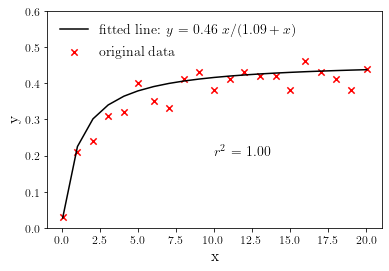

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
x=np.array([0.07, 1.04,2.06, 3.06, 4.09, 5.01, 6.05, 7.05, 8.02, 9.03, 10.03, 11.07,12.01,13.02,14.08, 15.01, 16.01, 17.04, 18.01, 19.03, 20.05])
y=np.array([0.03, 0.21, 0.24, 0.31, 0.32, 0.40, 0.35, 0.33, 0.41, 0.43, 0.38, 0.41, 0.43, 0.42, 0.42, 0.38, 0.46, 0.43, 0.41, 0.38, 0.44])

xinv = 1.0/x
yinv = 1.0/y

# calculate the linear regression coefficients 
alpha, beta, r2 = calculate_linear_regression_coef(xinv, yinv) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

#back-calculate the coefficients
a0 = 1.0/beta
a1 = alpha/beta

# predicted value using the fitting curve
y_pred = a0 * (x / (a1 + x)) 

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line: $y$ = %.2f $ x/(%.2f + x$)'%(a0, a1)) 

plt.text(10,0.2,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

plt.ylim([0, 0.6])

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

## Polynomial curve fitting

Another common type of nonlinear curve fitting is polynomial regression (curve fitting). Of course, linear curve (straight line) fitting is a special case of polynomial regression (with the polynomial's degree to be one). The same procedure of least-squares criterion can be used to derive the formula. 

The popularity of polynomial curve fitting is due to the fact that polynomials are easy to be:
* evaluated
* differentiated
* integrated

The goal of polynomial regression analysis is to find a polynomial function which fits the given set of data points best. The $m$-th order polynomial function can be written as 
\begin{equation}
   y = a_0 + a_1 x + a_2 x^2 + ... + a_m x^m + e
\end{equation}
where $a_i$, $i \in [0,m]$ are regression coefficients. $e$ is the error or residual. Again, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)^2
\end{equation}

The minimization of the residual can be achieve through
\begin{equation}
\frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m \right)=0
\end{equation}
\begin{equation}
\frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_1 \right]=0
\end{equation}
\begin{equation}
\vdots
\end{equation}
\begin{equation}
\frac{dError}{da_m} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i - a_2 x_i^2 - ... - a_m x_i^m\right) x_i^m \right]=0
\end{equation}

This can be written as a linear equation system for the unknown coefficient vector $\mathbf{a}=[a_0, a_1, a_2, ..., a_m]^T$:
\begin{equation}
\mathbf{A} \mathbf{a} = \mathbf{b}
\end{equation}
where 
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
  n & \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 &\cdots & \sum_{i=0}^{N-1} x_i^m \\
  \sum_{i=0}^{N-1} x_i & \sum_{i=0}^{N-1} x_i^2 & \sum_{i=0}^{N-1} x_i^3 &\cdots & \sum_{i=0}^{N-1} x_i^{m+1} \\
  \vdots & \vdots & \vdots & \vdots   \\
  \sum_{i=0}^{N-1} x_i^{m-1} & \sum_{i=0}^{N-1} x_i^m & \sum_{i=0}^{N-1} x_i^{m+1} &\cdots & \sum_{i=0}^{N-1} x_i^{2m} \\  
  \end{bmatrix}
\end{equation}
and 
\begin{equation}
\mathbf{b} = 
\begin{bmatrix}
\sum_{i=0}^{N-1} y_i \\
\sum_{i=0}^{N-1} x_i y_i \\
\vdots \\
\sum_{i=0}^{N-1} x_i^m y_i
\end{bmatrix}
\end{equation}

It is noted that the matrix $\mathbf{A}$ is ill-conditioned. The problem gets worse as the degree of the polynomial increases. Fortunately, polynomials with very high degree are seldom sought in reality. 

From the programming point of view, the formula for the entries in the matrix and right hand side vector can be written as
\begin{equation}
A_{jk} = \sum_{i=0}^{N-1} x_i^{j+k}
\end{equation}
and 
\begin{equation}
b_j = \sum_{i=0}^{N-1} x_i^j y_i
\end{equation}

The polynomial regression algorithm is implemented in the "regression_lib" library:
```python
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a
```
and an example of use is shown below. 

The following example uses the polynomial regression function to fit the given data points. Both the original data points and the fitted polynomial are plotted for comparison.

Fitted 3-th order polynomial coefficients =  [-1995.09157362   918.53315943  -112.86130699     2.75041752]


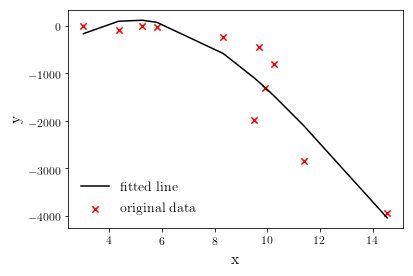

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

#calcuate the coefficients for polynomial regression
#m is the degree of the polynomial.
#returns the coefficient array a for the polynomial
def calculate_poly_regression_coef(x, y, m): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)
    
    if(n<(m+1)):
        sys.exit("Polynomial regress is impossible because n is less than m + 1.")

    A = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    
    #loop over each row of matrix A
    for i in range(m+1):
        #loop over each column of current row
        for j in range(m+1):
            if((i+j)==0):
                A[i,j] = n
            else:
                A[i,j] = np.sum(x**(i+j))
                
        if(i==0):
            b[i] = np.sum(y)
        else:
            b[i] = np.inner(x**i, y)
                
    #print(A)
    #print(b)

    # calculating regression coefficients by solving
    # the linear equation system. Here, we call 
    # the solve function in Numpy's linalg package. 
    a = np.linalg.solve(A, b)

    return a

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])
#y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -28450.27, -3933.67])

# order of the polynomial to be fitted
m = 3

# calculate the linear regression coefficients 
a = calculate_poly_regression_coef(x, y, m) 

print("Fitted %d-th order polynomial coefficients = "%m, a)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
for i in range(m+1):
    if(i==0):
        y_pred = a[0]*np.ones(np.size(x))
    else:
        y_pred = y_pred + a[i]*x**i

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 

#### Newton's polynomial interpolation method

The method above involves the solution of a linear system. It is a brutal force method because the matrix $\mathbf{A}$ becomes ill-conditioned as the degree of the polynomial increases. An alternative method is the Newton's divided difference method.

The way to derive the Newton's divided difference method is to start with first order (linear) and second-order (quadratic) polynomials and then make a generalization.

* First-order (linear) polynomial
    Two data points are needed to fit a first-order polynomial. Let's note them as ($x_0$, $y_0$) and ($x_1$, $y_1$). Assume the linear interpolant has the form of 
\begin{equation}
f_1(x) = b_0 + b_1(x-x_0)
\end{equation}
The coefficients $b_0$ and $b_1$ are unknown and needed to be solved for. 

Plugging the two given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0) &=& y_0 \\
b_0 + b_1(x_1 - x_1) &=& y_1
\end{eqnarray}
It is easy to solve for the two coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0}
\end{eqnarray}

* Second-order (quadratic) polynomial
    Three data points are needed to fit a second-order polynomial. Let's note them as ($x_0$, $y_0$), ($x_1$, $y_1$), and ($x_2$, $y_2$). Assume the quadratic interpolant has the form of 
\begin{equation}
f_2(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1)
\end{equation}
The three coefficients $b_0$, $b_1$ and $b_2$ are unknown and needed to be solved for. 

Plugging the three given data points, one can get
\begin{eqnarray}
b_0 + b_1(x_0 - x_0)+ b_2 (x_0-x_0)(x_0-x_1) &=& y_0 \\
b_0 + b_1(x_1 - x_1)+ b_2 (x_1-x_0)(x_1-x_1) &=& y_1 \\
b_0 + b_1(x_2 - x_1)+ b_2 (x_2-x_0)(x_2-x_1) &=& y_2
\end{eqnarray}
It is easy to solve for the three coefficients:
\begin{eqnarray}
b_0 &=& y_0 \\
b_1 &=& \frac{y_1 - y_0}{x_1 - x_0} \\
b_2 &=& \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0}
\end{eqnarray}

* The $n$-th order polynomial
    $n+1$ data points are needed to fit a $n$-th order polynomial. Let's note them as ($x_i$, $y_i$), $i$ = 0, 1, 2, ..., n. Notice that the coefficients derived above are approximations of the derivatives, also termed finite divided differences. We note
\begin{equation}
b_0 = f[x_0] = y_0
\end{equation}
\begin{equation}
b_1 = f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}
\end{equation}
\begin{equation}
b_2 = f[x_2, x_1, x_0] = \frac{\frac{y_2-y_1}{x_2-x_1} - \frac{y_1-y_0}{x_1-x_0}}{x_2-x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_0}
\end{equation}

\begin{equation}
\vdots
\end{equation}

\begin{equation}
b_{n-1} = f[x_{n-1}, x_{n-2}, \cdots, x_0]
\end{equation}
\begin{equation}
b_{n} = f[x_{n}, x_{n-1}, \cdots, x_0]
\end{equation}

In fact, the following recursive relation holds
\begin{eqnarray}
b_m &=& f[x_m, x_{m-1}, \cdots, x_0] \\
    &=& \frac{f[x_m, x_{m-1}, \cdots, x_1] - f[x_{m-1}, x_{m-2}, \cdots, x_0]}{x_m - x_0}
\end{eqnarray}

Assume the $n$-th order polynomial interpolant has the form of 
\begin{equation}
f_n(x) = b_0 + b_1(x-x_0) + b_2 (x-x_0)(x-x_1) + ... + b_n (x-x_0)(x-x_1)\cdots(x-x_{n-1})
\end{equation}

\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2,x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3,x_2,x_1,x_0]\\
x_2 & y_2 &             & f[x_3,x_2,x_1] &             & f[x_4,x_3,x_2,x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4,x_3,x_2,x_1]\\
x_3 & y_3 &             & f[x_4,x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}

The algorithm to calculate the Newton's divided difference coefficients is listed in the following figure and implemented in the code below. 
<img src="Newton_divided.pdf" alt="Newton_divided" width="400"/>

In [5]:
#source: https://www.geeksforgeeks.org/newtons-divided-difference-interpolation-formula/

# Function to find the product term
def proterm(i, value, x):
    pro = 1.0
    for j in range(i):
        pro = pro * (value - x[j])
        
    return pro

# Function for calculating
# divided difference table
def dividedDiffTable(x, y, n):
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                        (x[j] - x[i + j]))
    return y

# Function for applying Newton’s
# divided difference formula
def applyFormula(value, x, y, n):
    sum = y[0][0]
    
    for i in range(1, n):
        sum = sum + (proterm(i, value, x) * y[0][i])

    return sum;

# Driver Code

# number of inputs given
n = 4
y = np.zeros([n,n])
x = [ 5, 6, 9, 11 ];

# y[][] is used for divided difference
# table where y[][0] is used for input
y[0][0] = 12
y[1][0] = 13
y[2][0] = 14
y[3][0] = 16

# calculating divided difference table
y=dividedDiffTable(x, y, n)

# value to be interpolated
value = 7

# printing the value
print("Value at ", value, "is ", round(applyFormula(value, x, y, n), 2))

Value at  7 is  13.47


## Nonlinear regression

Up until now, we only considered linear regressions, polynomial regressions, and linearizable nonlinear regressions. For general nonlinear regression, the basic idea is the same, i.e., to determine the coefficients for the minimization of the sum of the squares of the residuals. Unlike linear regression, an iterative approach has to be used to calculate the coefficients. One such method is the Gauss-Newton method. 

## Python built-in curve fitting and interpolation functions and capabilities

* Numpy's "polyfit(...)" function for polynomial regression. 
    The following example use the same set of data as above and calls the "polyfit" function in Numpy which takes the data set and desired polynomial order as input and returns the polynomial coefficients. The example also utilizes the "poly1d" function in Numpy which constructs a one-dimensional polynomial (meaning a polynomial function of single variable) from given coefficients. The constructed polynomial function can then be used to evaluate function values at given $x$.

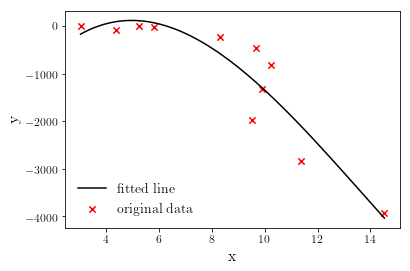

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

#set the degree of polynomial and call polyfit to get the coefficients.
degree = 3
coeffs = np.polyfit(x, y, degree)

#get the fitted function
f_fit = np.poly1d(coeffs)

x_new = np.linspace(x[0], x[-1], 100)

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred =f_fit(x_new)

# plotting the regression line 
plt.plot(x_new, y_pred, color = "k", label='fitted line') 

#plt.text(5,5,r'$r^2$ = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show() 


* The "least_squares" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a give set of data. Note that there is also the legacy "leastsq(...)" function available in SciPy. The newer version of the least squares regression "least_squares" is that it can specify the upper and lower boundaries for regression parameters. You should use the newer version unless you have a special reason to use the old version "leastsq(...)". 

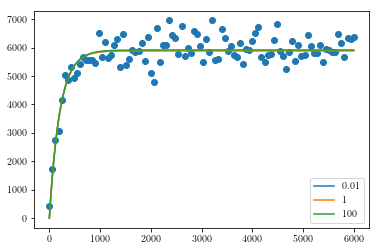

In [7]:
#https://stackoverflow.com/questions/49339079/curve-fitting-with-scipys-least-squares

import numpy
import matplotlib.pyplot as plt
import scipy.optimize

tmax = 6000
N = 100
K = 6000
T = 200

smootht = numpy.linspace(0, tmax, 1000)
tm = numpy.linspace(0, tmax, N)

def f(t, K, T):
    return K * (1 - numpy.exp(-t/T))

v = f(smootht, K, T)

vm = f(tm, K, T) + numpy.random.randn(N)*400

def error(pars):
    K, T = pars
    vp = f(tm, K, T)
    return vm - vp

f_scales = [0.01, 1, 100]

plt.scatter(tm, vm)
for f_scale in f_scales:
    r = scipy.optimize.least_squares(error, [10, 10], loss='soft_l1', f_scale=f_scale)
    vp = f(smootht, *r.x)
    plt.plot(smootht, vp, label=f_scale)
plt.legend()
plt.show()

* The "curve_fit" function in [SciPy (Scientific Python)](https://www.scipy.org)'s optimize library: it uses non-linear least squares to fit a function for a give set of data.

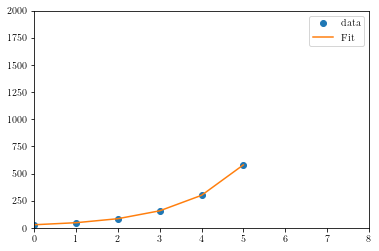

In [8]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([30, 50, 80, 160, 300, 580])
fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
a, b, c = fitting_parameters

plt.plot(x, y, 'o', label='data')
plt.plot(x, exponential_fit(x, *fitting_parameters), '-', label='Fit')

plt.axis([0, 8, 0, 2000])
plt.legend()
plt.show()

* Numpy's "interp(...)" function: which performs one-dimensional, piecewise linear interpolation with a given set of data points ($x_i$, $f_i$), and return the interpolated function value at the given $x$. For the given data points, the $x_i$ has to be in ascending order. 

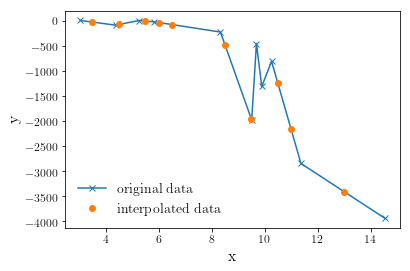

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


x = np.array([3.04, 4.37, 5.26, 5.82, 8.33, 9.51, 9.69, 9.89, 10.26, 11.37, 14.53])
y = np.array([3.07, -90.43, 1.92, -23.57, -227.71, -1978.53, -458.08, -1312.24, -811.01, -2845.27, -3933.67])

xvals = np.array([3.5, 4.5, 5.5, 6.0, 6.5, 8.5, 9.5, 10.5, 11.0, 13.0])
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, '-x', label='original data')
plt.plot(xvals, yinterp, 'o', label='interpolated data')

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='lower left',fontsize=14,frameon=False)

plt.show()